In [1]:
import pandas as pd
df1=pd.read_csv("test.csv")
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [2]:
df1.shape

(13564, 17)

In [3]:
df1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
 # identing categorial and continuous variable
df1.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

# analysing continous variables



In [7]:
df1.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


<Axes: ylabel='Frequency'>

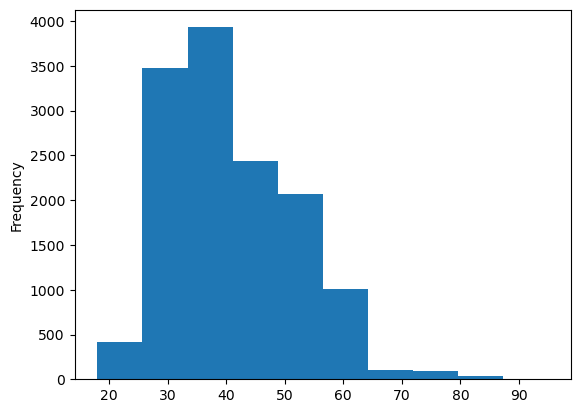

In [10]:
#ploting hsitogram of age
df1["age"].plot.hist()

<Axes: >

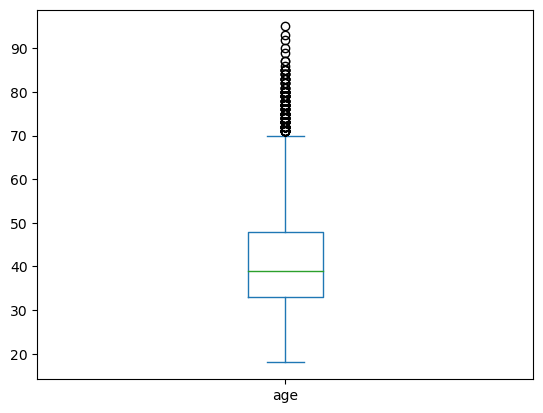

In [11]:
#ploting box plot for any outlier in the data
df1["age"].plot.box()

In [20]:
df1["marital"].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

<Axes: >

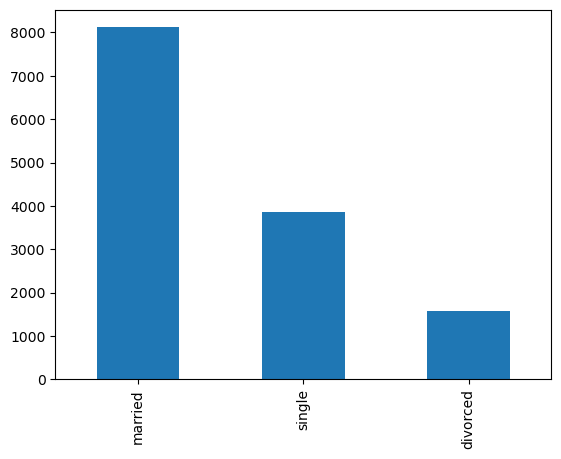

In [21]:
df1["marital"].value_counts().plot.bar()

In [22]:
#creating frequencies from above tabel for categorial variable
df1["marital"].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

In [23]:
#percentages from table
df1["marital"].value_counts()/len(df1["marital"])

married     0.598570
single      0.285167
divorced    0.116264
Name: marital, dtype: float64

<Axes: xlabel='duration', ylabel='balance'>

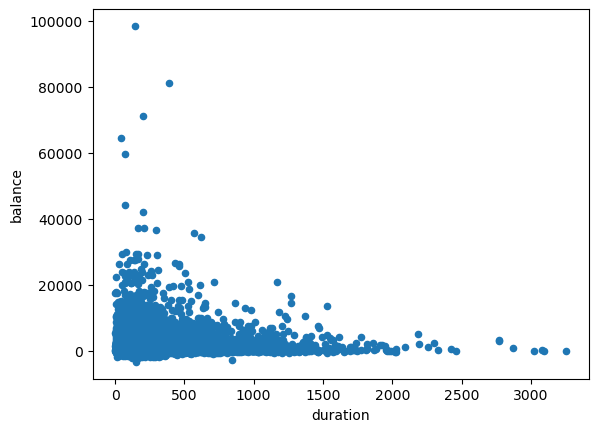

In [31]:
#scatter ploting #continous-continous categarial method
df1.plot.scatter("duration","balance")

In [32]:
df1.corr()

C:\Users\vinay\AppData\Local\Temp\ipykernel_2908\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.018874,0.086916,-0.056813,0.026686,-0.101389,0.441437,0.321845
age,0.018874,1.000000,0.085246,-0.004622,-0.006456,0.002439,-0.027797,-0.011326
balance,0.086916,0.085246,1.000000,0.006890,0.015375,-0.020524,0.007136,0.024824
day,-0.056813,-0.004622,0.006890,1.000000,-0.025344,0.170421,-0.105314,-0.060719
duration,0.026686,-0.006456,0.015375,-0.025344,1.000000,-0.094653,-0.006308,-0.000415
campaign,-0.101389,0.002439,-0.020524,0.170421,-0.094653,1.000000,-0.091116,-0.032366
pdays,0.441437,-0.027797,0.007136,-0.105314,-0.006308,-0.091116,1.000000,0.534085
previous,0.321845,-0.011326,0.024824,-0.060719,-0.000415,-0.032366,0.534085,1.000000


In [35]:
df1['balance'].corr(df1["duration"])

0.015375249452207421

In [36]:
#continous-categarial representation
df1.groupby("marital")['age'].mean()

marital
divorced    45.409004
married     43.422712
single      33.721303
Name: age, dtype: float64

<Axes: xlabel='marital'>

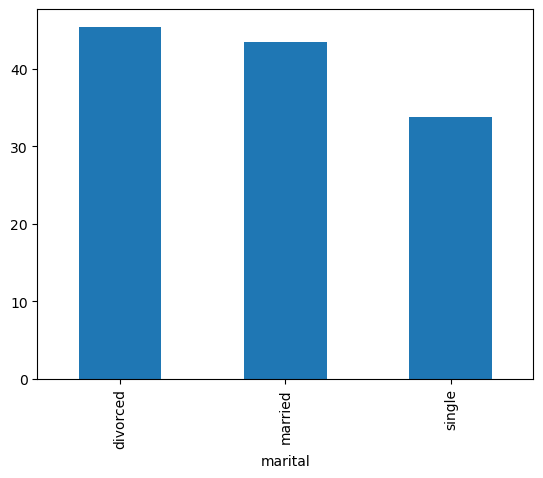

In [37]:
df1.groupby("marital")['age'].mean().plot.bar()

In [41]:
from scipy.stats import ttest_ind

In [42]:
divorced=df1[df1['age']=="divorced"]
married=df1[df1['age']=='married']
ttest_ind(divorced['age'],married['age'],nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

In [40]:
!pip install scipy
